collab link : https://colab.research.google.com/drive/16HiRC8RsW3TuoNlo7oqFL7_7qmwKJcZR?usp=sharing


#Text Processing with Web Scraping
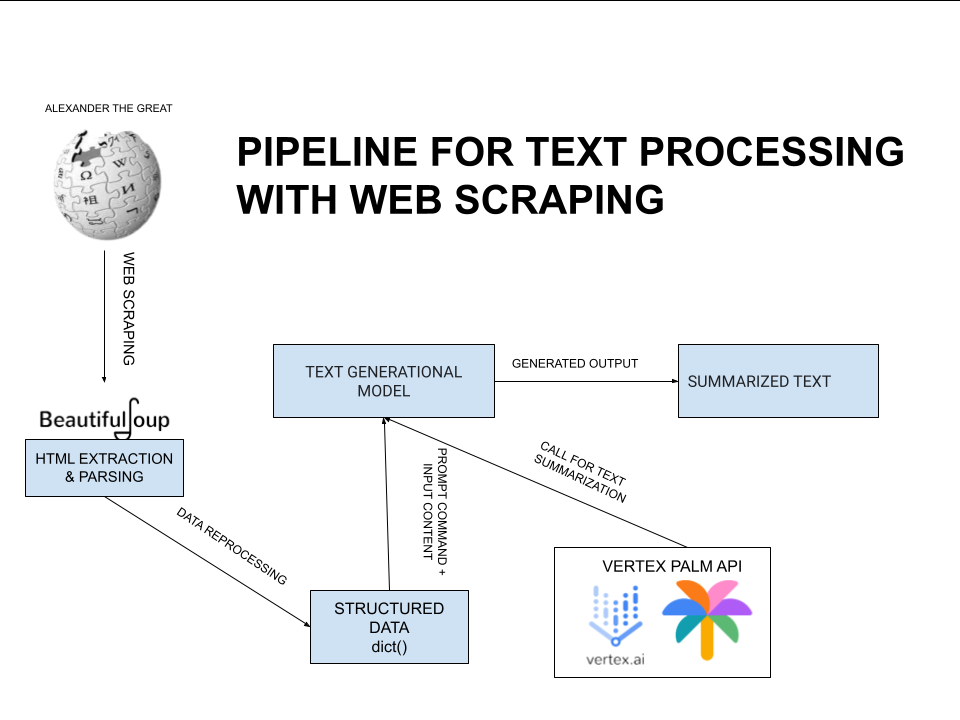

#Problems encountered when doing text processing with web scraping :            



---



1.Difficulties encountered while web scraping:
* The main challenge was choosing which
approach to use for scraping i.e. wether to scrape with html tags as the summary needed structural integrity or choosing to scrape just the content.

* And maintaining the  websites's data structural integrity


---


2. Difficulties encountered while text summarization:
*  Ensuring that the data input size is within the limit  
Potential Challange: Since the content was under the input size limit, no   
chunking was required. Otherwise, an additional level of preprocessing would be required.

*  API calls for summarization exceeded the request quota per minute. As I was using loop it exceeded 60 calls per minute quota so I had to use time library to ensure it does not exceed the call limit



---


3. It was challenging to choose the right evaluation metrics.









#**WEB SCRAPPING**

Import **BeautifulSoup** for WebScrapping, and **requests** for text from the given url.

In [ ]:
from bs4 import BeautifulSoup
import requests

Defining the **URL** that is to be scrapped

In [ ]:
url = "https://en.wikipedia.org/wiki/Alexander_the_Great"

Retrieving the web page content and creating a BeautifulSoup object to parse the HTML content of the web page

In [ ]:
page =  requests.get("https://en.wikipedia.org/wiki/Alexander_the_Great")
soup = BeautifulSoup(page.content,'html.parser')


Storing the relevant data that is to be summarized in content variable

In [ ]:
content =soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5','p'])

Analysing the structure of web-page

In [ ]:
soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5'])

[<h2 class="vector-pinnable-header-label">Contents</h2>,
 <h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">Alexander the Great</span></h1>,
 <h2><span class="mw-headline" id="Early_life">Early life</span></h2>,
 <h3><span class="mw-headline" id="Lineage_and_childhood">Lineage and childhood</span></h3>,
 <h3><span class="mw-headline" id="Education">Education</span></h3>,
 <h2><span class="mw-headline" id="Heir_of_Philip_II">Heir of Philip II</span></h2>,
 <h3><span class="mw-headline" id="Regency_and_ascent_of_Macedon">Regency and ascent of Macedon</span></h3>,
 <h3><span class="mw-headline" id="Exile_and_return">Exile and return</span></h3>,
 <h2><span class="mw-headline" id="King_of_Macedon">King of Macedon</span></h2>,
 <h3><span class="mw-headline" id="Accession">Accession</span></h3>,
 <h3><span class="mw-headline" id="Consolidation_of_power">Consolidation of power</span></h3>,
 <h3><span class="mw-headline" id="Balkan_campaign">Balkan ca

The following code creates a dictionary, where heading is the key and the content under that heading is value.

In [ ]:
# Initializing an empty dictionary to store the results
result_dict = {}

# Initializing a variable to keep track of the current heading
current_heading = None

# Iterating through the content list
for tag in content:
    if tag.name in ['h1', 'h2', 'h3', 'h4', 'h5']:
        # Updating the current heading
        current_heading = tag.get_text(strip=True)
        result_dict[current_heading] = ""  # Initializing an empty string for the heading

    elif tag.name == 'p' and current_heading is not None:
        # Checking if there is a valid current heading
        # and if the tag is a <p> tag
        # Adding the content of the <p> tag to the dictionary
        result_dict[current_heading] += tag.get_text() + ' '  # Appending to the heading's content

# Printing the result dictionary
for heading, content in result_dict.items():
    print(f'{heading}: {content.strip()}')


Contents: 
Alexander the Great: Alexander III of Macedon (Ancient Greek: Ἀλέξανδρος, romanized: Alexandros; 20/21 July 356 BC – 10/11 June 323 BC), commonly known as Alexander the Great,[a] was a king of the ancient Greek kingdom of Macedon.[a] He succeeded his father Philip II to the throne in 336 BC at the age of 20, and spent most of his ruling years conducting a lengthy military campaign throughout Western Asia and Egypt. By the age of 30, he had created one of the largest empires in history, stretching from Greece to northwestern India.[2] He was undefeated in battle and is widely considered to be one of history's greatest and most successful military commanders.[3][4]
 Until the age of 16, Alexander was tutored by Aristotle. In 335 BC, shortly after his assumption of kingship over Macedon, he campaigned in the Balkans and reasserted control over Thrace and parts of Illyria before marching on the city of Thebes, which was subsequently destroyed in battle. Alexander then led the Le

The following code removes unnecessary headings from the result_dict, which is decided based on the output of previous step.

In [ ]:
# Headings that are to be removed
excluded_headings = [
    'Battle record',
    'See also',
    'References',
    'Notes',
    'Citations',
    'Sources',
    'Primary sources',
    'Secondary sources',
    'Further reading',
    'External links',
    'Contents'
]

# Removing excluded headings from the result_dict
result_dict = {heading: content for heading, content in result_dict.items() if heading not in excluded_headings}

# Printing the updated result dictionary
for heading, content in result_dict.items():
    print(f'{heading}: {content.strip()}')


Alexander the Great: Alexander III of Macedon (Ancient Greek: Ἀλέξανδρος, romanized: Alexandros; 20/21 July 356 BC – 10/11 June 323 BC), commonly known as Alexander the Great,[a] was a king of the ancient Greek kingdom of Macedon.[a] He succeeded his father Philip II to the throne in 336 BC at the age of 20, and spent most of his ruling years conducting a lengthy military campaign throughout Western Asia and Egypt. By the age of 30, he had created one of the largest empires in history, stretching from Greece to northwestern India.[2] He was undefeated in battle and is widely considered to be one of history's greatest and most successful military commanders.[3][4]
 Until the age of 16, Alexander was tutored by Aristotle. In 335 BC, shortly after his assumption of kingship over Macedon, he campaigned in the Balkans and reasserted control over Thrace and parts of Illyria before marching on the city of Thebes, which was subsequently destroyed in battle. Alexander then led the League of Cor

The following step is one to check the character count of each value in dictionary. This is done because vertex ai model has an input limit of around 8100 characters

In [ ]:
# Initializing the character count dictionary
char_count_dict = {}

# Iterating through the result_dict
for heading, content in result_dict.items():
    char_count = len(content)
    char_count_dict[heading] = char_count

# Printing the character count for each value in the result_dict
for heading, char_count in char_count_dict.items():
    print(f'Heading: {heading}')
    print(f'Character Count: {char_count}')


Heading: Alexander the Great
Character Count: 3749
Heading: Early life
Character Count: 0
Heading: Lineage and childhood
Character Count: 3220
Heading: Education
Character Count: 1907
Heading: Heir of Philip II
Character Count: 0
Heading: Regency and ascent of Macedon
Character Count: 3152
Heading: Exile and return
Character Count: 2597
Heading: King of Macedon
Character Count: 0
Heading: Accession
Character Count: 446
Heading: Consolidation of power
Character Count: 2399
Heading: Balkan campaign
Character Count: 1020
Heading: Destruction of Thebes
Character Count: 475
Heading: Conquest of the Achaemenid Persian Empire
Character Count: 0
Heading: Asia Minor
Character Count: 2788
Heading: The Levant and Syria
Character Count: 931
Heading: Egypt
Character Count: 2283
Heading: Assyria and Babylonia
Character Count: 619
Heading: Persia
Character Count: 1635
Heading: Fall of the Persian Empire and the East
Character Count: 2074
Heading: Problems and plots
Character Count: 3506
Heading: Mace

In [ ]:
# !pip install google-cloud-aiplatform --upgrade --user

#**Text Summarization**

Authenticating google colab environment

In [ ]:
from google.colab import auth
auth.authenticate_user()

Importing aiplatform library from google cloud and initializing the project

In [ ]:
from google.cloud import aiplatform
aiplatform.init(
    project="phonic-skyline-400714",
    location="us-central1",
)

Loading Text Generational Model

In [ ]:
#Importing the TextGenerationModel class from the Vertex AI library
from vertexai.preview.language_models import TextGenerationModel
#Initializing a text generation model by loading a pretrained model named "text-bison@001
model = TextGenerationModel.from_pretrained("text-bison@001")


In [ ]:
#Creating the prompt for summary generation
prompt ="Generate a concise and coherent summary of the following text. Summarize the key points in approximately 50 to 70 words." + " "

The next section repeatedly loops through the result_dict, summarising each value and storing it in the summary_dict.
To make sure that the request call does not exceed the quota restriction, I imported a time library, which waits for 10 secs after each call.

In [ ]:
import time
summary_dict = {}
for heading, content in result_dict.items():
    if content.strip():  # Checking if content is not empty or contains only whitespace
        # Creating new prompt by combining the general prompt and the content
        combined_prompt = f"{prompt} {content}"
        # Generating summary using the model
        summary = model.predict(combined_prompt, temperature=0.3, max_output_tokens=254).text
        # Storing the summary in the summary_dict
        summary_dict[heading] = summary
    else:
        # Replicating the key-value pair in the summary_dict for empty or no content
        summary_dict[heading] = content
    time.sleep(10)

# Printing the summary_dict
for heading, summary in summary_dict.items():
    print(f'{heading}: {summary}')

Alexander the Great: Alexander the Great was a king of the ancient Greek kingdom of Macedon. He was undefeated in battle and is widely considered to be one of history's greatest and most successful military commanders.
He conquered the Achaemenid Persian Empire and created one of the largest empires in history, stretching from Greece to northwestern India.
He also founded more than twenty cities, with the most prominent being the city of Alexandria in Egypt.
Alexander's legacy includes the cultural diffusion and syncretism that his conquests engendered, such as Greco-Buddhism and Hellenistic Judaism.
His military achievements and unprecedented enduring successes in battle made him the measure against which many later military leaders would compare themselves.
Early life: 
Lineage and childhood: Alexander III was born in Pella, the capital of the Kingdom of Macedon, on the sixth day of the ancient Greek month of Hekatombaion, which probably corresponds to 20 July 356 BC. He was the son 

#**Evaluation**

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=24717b2674ed1446fc4ce7c7d21804bd2c12090b7bddf5d963882e701dd91f64
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


**Method 1 : Rouge Socre**
The following code determines the typical Rouge scores (precision, recall, and F1-score) for the generated summaries in summary_dict in comparison to the scrapped data from result_dict.


In [ ]:
from rouge_score import rouge_scorer

rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_dict = {'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0}
count = 0

for heading, content in result_dict.items():
    if content.strip():  # Checking if content is not empty or contains only whitespace
        temp_score = rouge.score(content, summary_dict[heading])
        for metric in rouge_dict.keys():
            rouge_dict[metric] += temp_score[metric].fmeasure
        count += 1

# Calculating the average scores
for metric, score in rouge_dict.items():
    rouge_dict[metric] = score / count

print(f'Average Rouge Scores: {rouge_dict}')


Average Rouge Scores: {'rouge1': 0.29068703578598376, 'rouge2': 0.22682422314763326, 'rougeL': 0.25794367527538264}


**Method 2 : Cosine Similarity**
The following code determines how closely the generated summaries in summary_dict and the scraped data from result_dict are related on an average cosine similarity scale.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initializing a CountVectorizer
vectorizer = CountVectorizer()

cosine_similarity_scores = []

for heading, content in result_dict.items():
    if content.strip():  # Checking if content is not empty or contains only whitespace
        # Vectorizing the content and summary
        content_vector = vectorizer.fit_transform([content])
        summary_vector = vectorizer.transform([summary_dict[heading]])

        # Calculating the cosine similarity
        similarity_score = cosine_similarity(content_vector, summary_vector)

        cosine_similarity_scores.append(similarity_score[0][0])

# Calculating the average cosine similarity score
average_cosine_similarity = sum(cosine_similarity_scores) / len(cosine_similarity_scores)

print(f'Average Cosine Similarity Score: {average_cosine_similarity}')


Average Cosine Similarity Score: 0.5891539398871536
